<a href="https://colab.research.google.com/github/blackpandaapkm/Fake-News-Detection-using-SVM/blob/main/Fake_News_Detection_using_SVM_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
nRowsRead = None
dataset1 = pd.read_csv("/content/drive/MyDrive/dataset/Fake.csv", delimiter=',', nrows=nRowsRead)
dataset2 = pd.read_csv("/content/drive/MyDrive/dataset/True.csv", delimiter=',', nrows=nRowsRead)

In [ ]:
dataset1['label'] = "0"

dataset1

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [ ]:
dataset2['label'] = "1"

dataset2

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [ ]:
dataset = pd.concat([dataset1, dataset2])
dataset

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [ ]:
dataset.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
dataset = dataset.sample(frac=1, random_state=50).reset_index(drop=True)
dataset = dataset.drop(["subject", "date"], axis=1)
dataset = dataset.dropna()

In [ ]:
dataset

,title,text,label
0,"BREAKING: PETER W. SMITH, GOP Operative Who So...",The plot thickens Republican donor and operati...,0
1,This Amazing Photo Shows The POWER Women Have...,This photo shows the gravesite of Susan B. Ant...,0
2,SAVAGE ANTI-TRUMP PROTESTERS Knock Out Innocen...,AIRPORTS ACROSS THE COUNTRY were inundated wit...,0
3,South Korea's Moon says he's against having nu...,SEOUL (Reuters) - South Korean President Moon ...,1
4,WATCH: Trump Declares Himself One Of The Best...,"Seriously, this actually just happened.Prior t...",0
...,...,...,...
44893,South African Supreme Court upholds reinstatin...,"BLOEMFONTEIN, South Africa (Reuters) - South A...",1
44894,"‘Vote All You Want, The Secret Government Won’...",21st Century Wire says Those who pull the stri...,0
44895,North Korea's Kim says will make 'deranged' Tr...,SEOUL (Reuters) - North Korea s leader Kim Jon...,1
44896,Australia should accept New Zealand offer to r...,SYDNEY (Reuters) - The U.N. refugee agency on ...,1


In [ ]:
dataset['content'] = dataset['title'] + ' ' + dataset['text']
del dataset['title']
del dataset['text']
dataset

,label,content
0,0,"BREAKING: PETER W. SMITH, GOP Operative Who So..."
1,0,This Amazing Photo Shows The POWER Women Have...
2,0,SAVAGE ANTI-TRUMP PROTESTERS Knock Out Innocen...
3,1,South Korea's Moon says he's against having nu...
4,0,WATCH: Trump Declares Himself One Of The Best...
...,...,...
44893,1,South African Supreme Court upholds reinstatin...
44894,0,"‘Vote All You Want, The Secret Government Won’..."
44895,1,North Korea's Kim says will make 'deranged' Tr...
44896,1,Australia should accept New Zealand offer to r...


In [ ]:
le = preprocessing.LabelEncoder()
le.fit(dataset['label'])
dataset['label'] = le.transform(dataset['label'])
dataset.head()

,label,content
0,0,"BREAKING: PETER W. SMITH, GOP Operative Who So..."
1,0,This Amazing Photo Shows The POWER Women Have...
2,0,SAVAGE ANTI-TRUMP PROTESTERS Knock Out Innocen...
3,1,South Korea's Moon says he's against having nu...
4,0,WATCH: Trump Declares Himself One Of The Best...


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset['content'], dataset['label'])

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
from sklearn import svm
model = svm.SVC()
model.fit(X_train_tfidf, y_train)
print(f'Accuracy : {round(model.score(X_test_tfidf, y_test), 4)*100}%')

Accuracy : 99.52%


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
cv = CountVectorizer()
features = cv.fit_transform(X_train)
model = svm.SVC()
model.fit(features, y_train)
features_test = cv.transform(X_test)
print(f'Accuracy : {round(model.score(features_test, y_test), 4)*100}%')

Accuracy : 99.47%


In [ ]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [ ]:
y_pred = model.predict(X_test_tfidf)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print(classification_rep)

Accuracy: 0.9362138084632516
Precision: 0.9372026641294006
Recall: 0.9273206552438336
F1-score: 0.9322354722695437
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5914
           1       0.94      0.93      0.93      5311

    accuracy                           0.94     11225
   macro avg       0.94      0.94      0.94     11225
weighted avg       0.94      0.94      0.94     11225



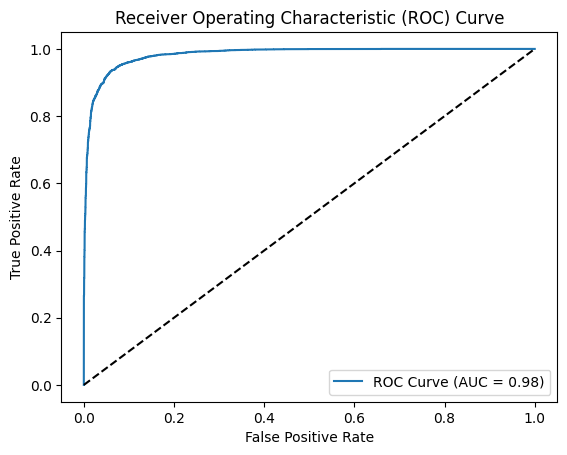

In [ ]:
y_pred_prob = model.predict_proba(X_test_tfidf)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[5584  330]
 [ 386 4925]]


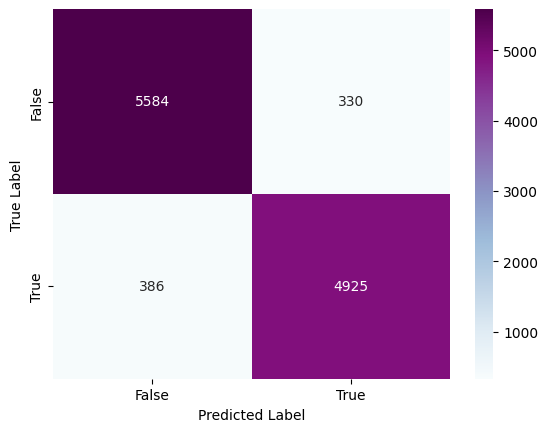

In [ ]:
# Define the labels for the confusion matrix
labels = ['False','True']

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='BuPu', fmt='g', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
tp = cm[1, 1]
tn = cm[0, 0]
fp = cm[0, 1]
fn = cm[1, 0]

print(tp)
print(tn)
print(fp)
print(fn)

# Calculate accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)

# Calculate precision
precision = tp / (tp + fp)

# Calculate recall
recall = tp / (tp + fn)

# Calculate F1-score
f1_score = 2 * (precision * recall) / (precision + recall)

# Print accuracy, precision, recall, and F1-score
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

4925
5584
330
386
Accuracy: 0.9362138084632516
Precision: 0.9372026641294006
Recall: 0.9273206552438336
F1-score: 0.9322354722695437
